In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

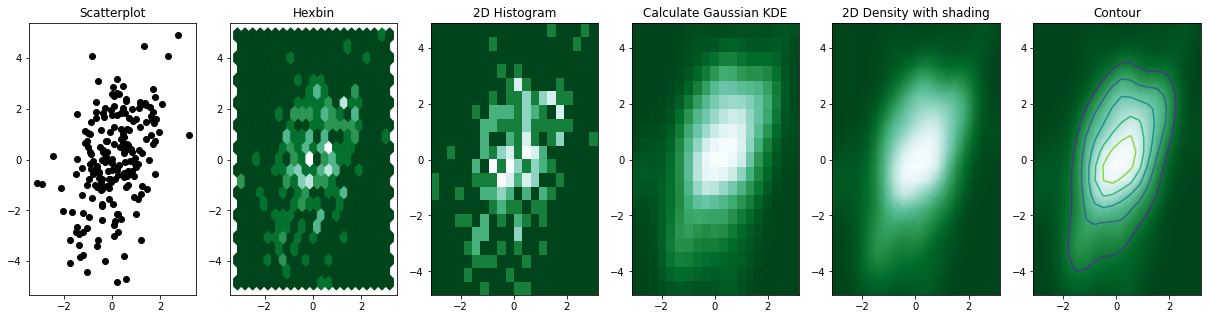

In [5]:
#hw2
# Libraries

from scipy.stats import kde
 
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )
